# Tutorial: Counting objects using labeling (Correction)

## Introduction

The goal of this tutorial is to learn basic image processing skills using a simple picture of coins on a table. Your task is to identify and count the coins.
You can use the following image or take a picture of your own and work with it.

<cimg><img src="coins.jpg" width="300px" class="rotateimg rot-135" /></cimg>

## Setup

In [1]:
%matplotlib widget
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import ndimage
import os
import warnings
warnings.filterwarnings('ignore')



##  Open the file

In [2]:
path = "coins.jpg"
files = os.listdir("./")
if path in files:
    print("Ok, the file is in {0}".format(files))
else:
    print("The file is not in {0} , retry !".format(files))

Ok, the file is in ['HSLA_340.jpg', '.ipynb_checkpoints', 'dices.jpg', 'coins.jpg', 'image_processing_practical_work_bonus.ipynb', 'image_processing_tutorial_correction.ipynb', 'image_processing_practical_work.ipynb', 'image_processing_tutorial.ipynb', 'exercises.md']


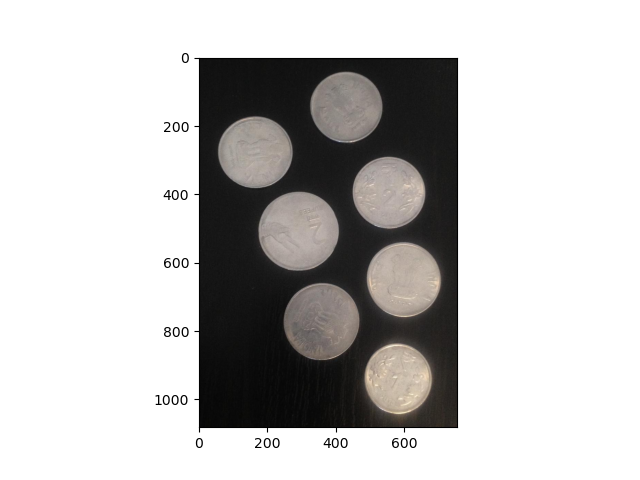

In [3]:
im = io.imread(path)
plt.figure()
plt.cla()
plt.imshow(im)
plt.show()

In [4]:
print(f"The image is a {type(im)}")
print(f"The shape of this numpy array is {im.shape} and the data type is {im.dtype}")
print(f"This image has {im.size} pixels")
print(f"The height is {im.shape[0]} and the width is {im.shape[1]}")
print(f"The image has {im.shape[2]} channels")

The image is a <class 'numpy.ndarray'>
The shape of this numpy array is (1082, 756, 3) and the data type is uint8
This image has 2453976 pixels
The height is 1082 and the width is 756
The image has 3 channels


## Plot the histogram

Plot the histogram of the image.

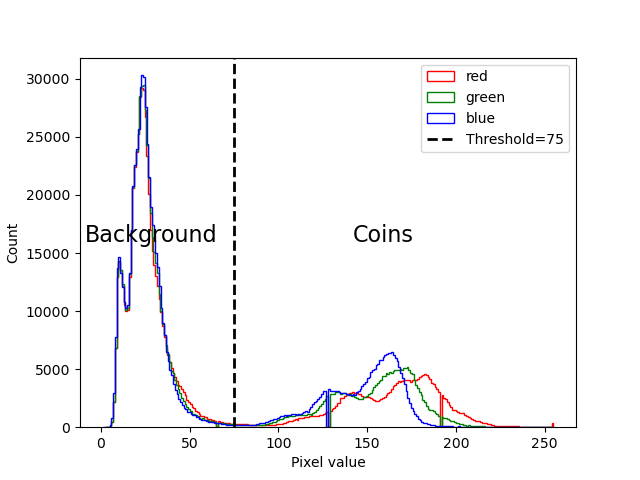

In [5]:

colors = ["red", "green", "blue"]

plt.figure("Histogram")
ax = plt.gca()
plt.cla()
for i in range(3):
    plt.hist(im[:, :, i].flatten(),
             bins=256,
             histtype="step",
             color=colors[i],
             label=colors[i])

thresh = 75
plt.axvline(thresh, 
            color="k",
            label=f"Threshold={thresh}",
            ls="dashed",
            lw = 2)

plt.text(x=0.01,y=0.5, s="Background",
         fontdict={"fontsize":16},
         transform=ax.transAxes)

plt.text(x=0.55,y=0.5, s="Coins",
         fontdict={"fontsize":16},
         transform=ax.transAxes)

    
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.legend()
plt.show()   

##  Thresholding

Use thresholding to convert the image to a binary format.

In [6]:
# Method 1: Double for loops
def func_thresh_1(im, thresh):
    bin_im = np.zeros_like(im[:, :])
    for i  in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i,j] > thresh:
                bin_im[i,j] = 255
    return bin_im

%timeit bin_im = func_thresh_1(im[:,:,0], thresh)

766 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Method 2: Vectorial comparison
def func_thresh_3(im, thresh):
    bin_im = np.zeros_like(im[:, :])
    bin_im[im[:,:]>thresh] = 255
    return bin_im

%timeit bin_im = func_thresh_3(im[:,:,0], thresh)


In [8]:
# Method 1bis: Double for loops + numba
from numba import njit

@njit
def func_thresh_2(im, thresh):
    bin_im = np.zeros_like(im[:, :])
    for i  in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i,j] > thresh:
                bin_im[i,j] = 255
    return bin_im

%timeit bin_im = func_thresh_2(im[:,:,0], thresh)

926 µs ± 329 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


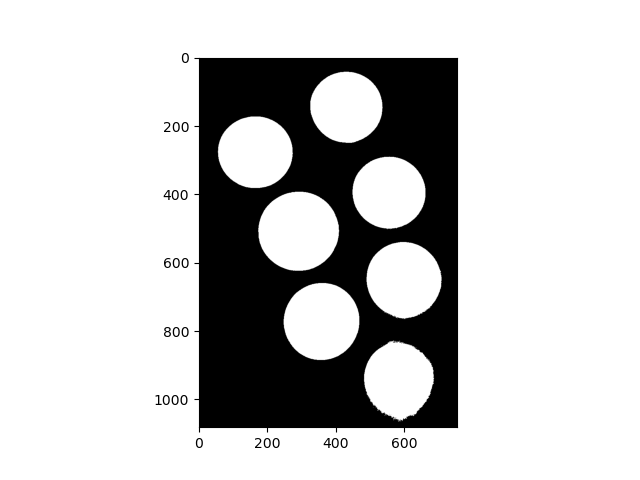

In [9]:
# Plot the binary image + interactive tresholding
import ipywidgets as widgets

global bin_im

bin_im = func_thresh_2(im[:,:,0], thresh)           
fig, ax = plt.subplots()
plt.cla()
line = ax.imshow(bin_im, cmap="gray")
plt.show()

#  Interactive thresholding
def update_tresh_00(thresh, line):
    bin_im = func_thresh_3(im[:,:,0], thresh)
    line.set_data(bin_im)
    
    
int_slider = widgets.IntSlider(min=0, max=255, step=1, value=75,
                               description="Threshold",
                               continuous_update=False)
int_slider.observe(lambda x: update_tresh_00(x["new"], line), "value")   

# Interactive ranged thresholding
def update_ranged_tresh(v_min, v_max, p):
    def func_ranged_tresh(im, min_val, max_val):
        bin_im = np.zeros_like(im[:, :])
        bin_im[(im[:,:]>=min_val) & (im[:,:]<=max_val)] = 255
        return bin_im
    bin_im = func_ranged_tresh(im[:,:,0], v_min, v_max)
    p.set_data(bin_im)
    

int_range_slider = widgets.IntRangeSlider(
    value=(75, 75), 
    min=0, max=255, step=1, 
    description='Ranged threshold'
)
int_range_slider.observe(lambda x: update_ranged_tresh(*x["new"], p), "value")

# Display the widgets
widgets.VBox(
    [
    int_slider,
    int_range_slider
    ])

## Erosion / Dilation 

Use **erosion** and **dilation** to clean the image if needed to isolate each coin.

In [10]:
global erod_im
global dilat_im

erod_im = ndimage.binary_erosion(bin_im,
                                 structure=np.ones([10,10]))
dilat_im = ndimage.binary_dilation(erod_im,
                                 structure=np.ones([10,10]))

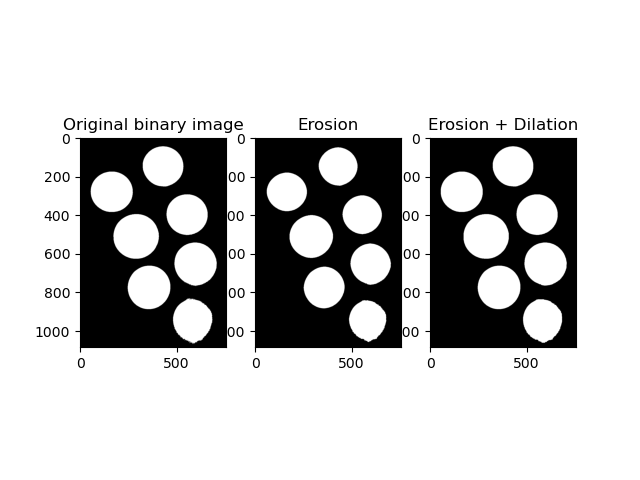

In [11]:
# Plot results
from matplotlib import gridspec
import itertools

fig = plt.figure("Erosion / Dilation effects")
Nr, Nc = 1, 3
gs = gridspec.GridSpec(Nr, Nc)
axs = [plt.subplot(gs[r, c])for r,c in itertools.product(range(Nr), range(Nc))]

axs[0].set_title("Original binary image")
line_bin = axs[0].imshow(bin_im, cmap="gray")

axs[1].set_title("Erosion")
line_erod = axs[1].imshow(erod_im, cmap="gray")

axs[2].set_title("Erosion + Dilation")
line_dilat = axs[2].imshow(dilat_im, cmap="gray")

plt.show()

def update_tresh(thresh, line_bin, line_erod, line_dilat, eV, dV):
    bin_im = func_thresh_3(im[:,:,0], thresh)
    erod_im = ndimage.binary_erosion(bin_im,
                                     structure=np.ones([eV,eV]))
    dilat_im = ndimage.binary_dilation(erod_im,
                                 structure=np.ones([dV,dV]))
    line_bin.set_data(bin_im)
    line_erod.set_data(erod_im)
    line_dilat.set_data(dilat_im)
    
def update_erod(struct_size, line_bin, line_erod, line_dilat, dV):
    # bin_im = line_bin.get_array()
    erod_im = ndimage.binary_erosion(bin_im,
                                     structure=np.ones([struct_size,struct_size]))
    dilat_im = ndimage.binary_dilation(erod_im,
                                 structure=np.ones([dV,dV]))
    line_erod.set_data(erod_im)
    line_dilat.set_data(dilat_im)
    
def update_dilat(struct_size, line_erod, line_dilat):
    # erod_im = line_erod.get_array()
    dilat_im = ndimage.binary_dilation(erod_im,
                                 structure=np.ones([struct_size,struct_size]))
    line_dilat.set_data(dilat_im)

tresh_slider = widgets.IntSlider(min=0, max=255, step=1, value=75,
                               description="Threshold",
                               continuous_update=False)
erod_slider = widgets.IntSlider(min=1, max=100, step=1, value=4,
                               description="Erosion struct size",
                               continuous_update=False)
dilat_slider = widgets.IntSlider(min=1, max=100, step=1, value=4,
                               description="Dilatation struct size",
                               continuous_update=False)


tresh_slider.observe(lambda x: update_tresh(x["new"], line_bin, line_erod, line_dilat, erod_slider.value, dilat_slider.value), "value")   
erod_slider.observe(lambda x: update_erod(x["new"], line_bin, line_erod, line_dilat, dilat_slider.value), "value")   
dilat_slider.observe(lambda x: update_dilat(x["new"], line_erod, line_dilat), "value")   

# Link Erosion and Dilatation struct size
widgets.jslink((erod_slider, 'value'), (dilat_slider, 'value'))

# Display the widgets
widgets.VBox(
    [
    tresh_slider,
    erod_slider,
    dilat_slider
    ])

## Labeling

Use the labeling (`scipy.ndimage.label`) algorithm to isolate each coin.

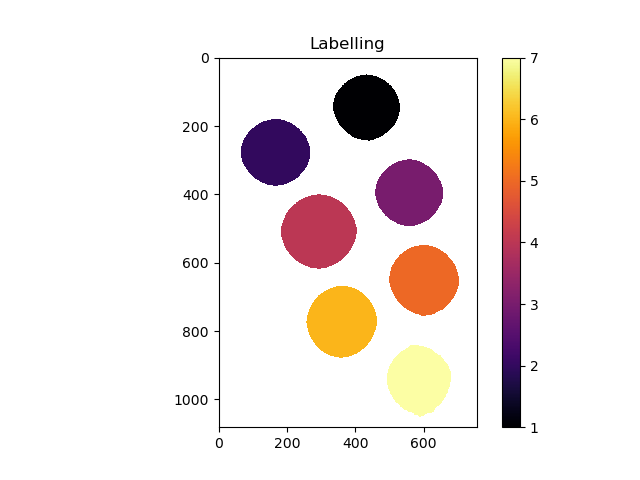

In [12]:
label_im, nb_labels = ndimage.label(erod_im)

# Replace background by numpy nan
label_im = label_im.astype(np.float32)
label_im[label_im==0] = np.nan

# Plot results
plt.figure()
plt.cla()
plt.title("Labelling")
plt.imshow(label_im, cmap="inferno")
plt.colorbar()
plt.show()
